# 3D Overthrust data - data creation
 
## Author: M.Ravasi

This notebook simply creates a well curated `dataset` for interpolation and showcases to users how their dataset must be organized for our scripts to run.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io as sp_io

## Parameters

## Loading data

Let's load now our shot gather to interpolate

In [2]:
isrc = 3338*4 # selected source
print('Source:', isrc)

# model size
ny, nx, nz = 200, 330, 155

# data size
nt, nrxorig, nryorig = 1126, 177, 90
nrx, nry = 176, 80
dt = 0.004
dx = 20

data = np.fromfile('/mnt/datawaha_dig/Data/Overtrust3D/Data/p_full%d.rsf@' % isrc, dtype='float32')
data = data.reshape(nt+75, nrxorig * nryorig)[75:]
data = data.reshape(nt, nryorig, nrxorig).transpose(2,1,0) # y,x,t
data = data[:nrx, :nry, :500]/np.max(np.abs(data[:nrx, :nry, :500]))

ns, nr, nt = data.shape
print(data.shape)

# Time axis
t = np.arange(0, nt) * dt

Source: 13352
(176, 80, 500)


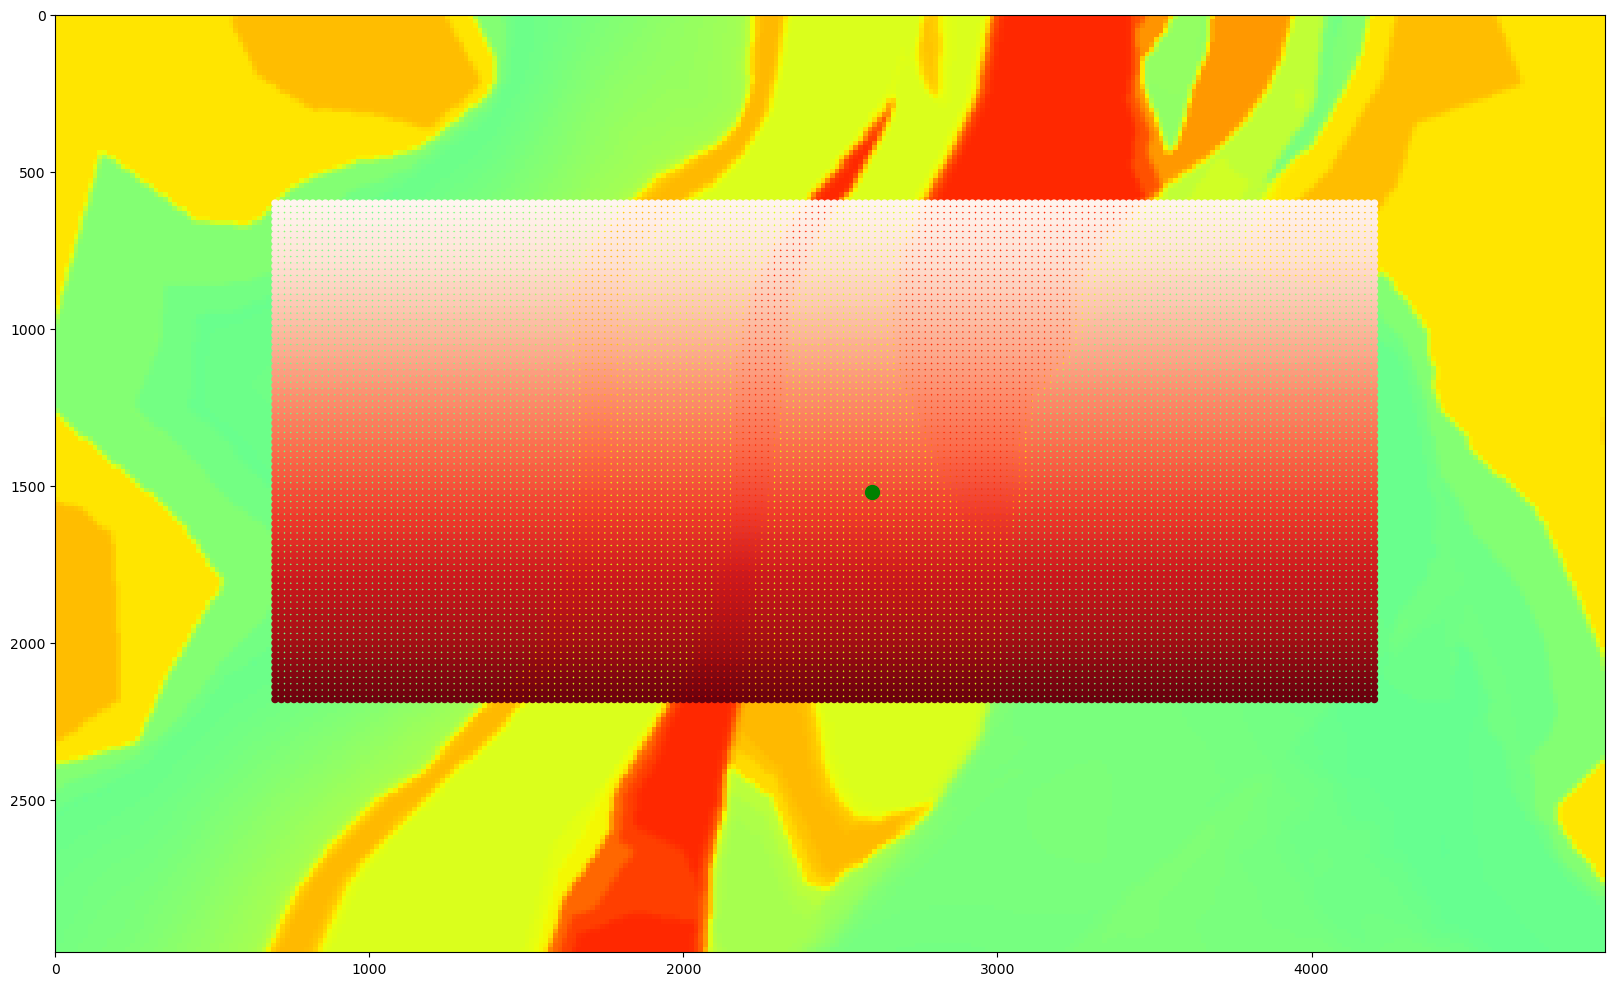

In [3]:
# Model
file = '/home/ravasim/Data/Overtrust3D/3-D_Overthrust_Model_Disk1/3D-Velocity-Grid/overthrust_small.bin'
y, x, z = np.arange(ny)*15., np.arange(nx)*15., np.arange(nz)*15.

traces = np.fromfile(file, dtype='f')
vp = traces.reshape(ny, nx, nz).astype(np.float32) # y,x,z arrangment

# Acquisition
srcx = np.arange(300,x[-1]-300, 20)
srcy = np.arange(300,y[-1]-300, 20)

SRCY, SRCX = np.meshgrid(srcy, srcx, indexing='ij')
SRCX, SRCY = SRCX.ravel(), SRCY.ravel()

recx = np.arange(700,x[-1]-700, 20)[:nrx]
recy = np.arange(600,y[-1]-600, 20)[:nry]

RECY, RECX = np.meshgrid(recy, recx, indexing='ij')
RECX, RECY = RECX.ravel(), RECY.ravel()

plt.figure(figsize=(20, 14))
plt.imshow(vp[:, :, 100], cmap='jet', clim=[1000, 3500], extent=(x[0], x[-1], y[-1], y[0]))
plt.scatter(RECX, RECY, c=np.arange(len(RECX)), s=20, cmap='Reds')
plt.scatter(SRCX[isrc], SRCY[isrc], c='g', s=100);

## Save

In [4]:
np.savez(f'../../data/Overthrust/ove_shot{isrc}', data=data, t=t,
         RECX=RECX, RECY=RECY, SRCX=SRCX[isrc], SRCY=SRCY[isrc], srcz=10, recz=300)